# Activációs függvények

Az aktivációs függvények kulcsfontosságúak ahhoz, hogy a neurális hálókkal megfelelő konfiguráció mellett komplex függvényeket lehessen közelíteni. Ehhez azonban, csak bizonyos aktivációs függvények jöhetnek szóba.

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True # this line is for autocomplete

In [2]:
from multilayer_nn import activations as a
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Creating a data vector to show the form of the activation functions
x = np.array([x_/10.0 for x_ in range(-60, 60, 1)])

In [4]:
def plot_activation(x, y):
    plt.plot(x, y, 'ro')

### Sigmoid

A sigmoid aktiváció képlete:

\begin{equation}
\sigma(x) = \frac{1}{1+e^{-x}}
\end{equation}

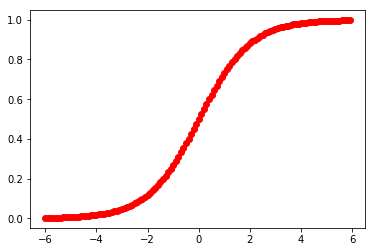

In [5]:
s = a.Sigmoid()
y = s.activate(x)
plot_activation(x, y)

### TanH

A tanh aktiváció képlete:

\begin{equation}
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}.
\end{equation}

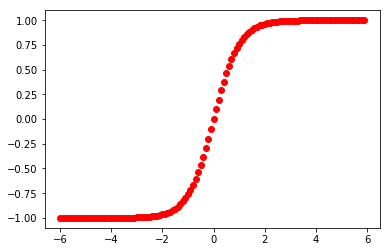

In [6]:
s = a.Tanh()
y = s.activate(x)
plot_activation(x, y)

### Softmax

A softmax függvény is tekinthető aktivációnak, azonban itt az eddigiektől eltérően a bemeneti vektor elemei nem függetlenül vannak kezelve. A kimeneti értékek 0 és 1 közé fognak esni, továbbá az elemek összege 1 lesz.

\begin{equation}
y_i = \frac{e^{x_i}}{\sum_j{e^{x_j}}}. 
\end{equation}

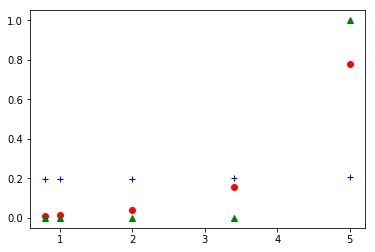

In [7]:
# now let us see an example and play around scaling
x_vec = np.array([2, 5, 1, 0.8, 3.4])
s = a.Softmax()
betas = [1e-2, 1, 1e2] # scaling factors
y_vecs = list(map(lambda beta: s.activate(beta * x_vec), betas))

plt.plot(x_vec, y_vecs[0], 'b+', x_vec, y_vecs[1], 'ro', x_vec, y_vecs[2], 'g^')

Amikor a $\beta$ kicsi a softmax egyenletes eloszlást, de ha az értéke nagy, akkor szelektívebbé válik. Azaz közel egy értéket rendel, ahhoz az elemhez, amelyikhez a legnagyobb bemenet tartozik (zöld háromszögek).

### ReLU

A relu képlete:

\begin{equation}
relu(x) = \max(0, x)
\end{equation}
    

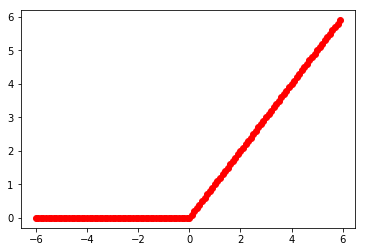

In [8]:
s = a.Relu()
y = s.activate(x)
plot_activation(x, y)

### ELu

Formula:

\begin{align}
elu(x) &=& x,\ x>0 \\
elu(x) &=& e^x - 1,\ otherwise
\end{align}

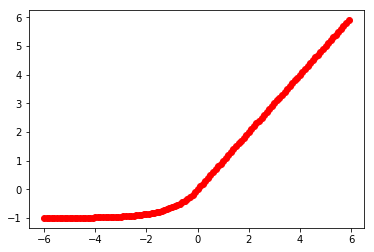

In [9]:
s = a.Elu()
y = s.activate(x)
plot_activation(x, y)

### SoftPlus

Formula:

\begin{equation}
softplus(x) = \log\left( e^x + 1\right).
\end{equation}

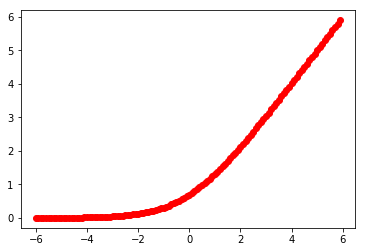

In [10]:
s = a.SoftPlus()
y = s.activate(x)
plot_activation(x, y)

## Dying relu

A jelenség szemléltetéséhez már egy neuron is elegendő. Ekkor a függvény, amivel a kimenet számolható:

\begin{equation}
y = relu(wx + b).
\end{equation}

Vegyük a következő helyzetet, ami egy tanulás során jöhet létre: 
* $w$-t és $b$-t akarjuk megtalálni
* mikor $x=5$, az elvárt kimenet $y=0.5$
* $w_0 = 0.2$ (feltesszük)
* $b_0 = 1.5$ (feltesszük)
* $\alpha = 0.2$ (tanulási ráta)
* MSE loss-t használunk.

A loss függvény:

\begin{equation}
L(w) = \frac{1}{2} \left(relu(wx+b) - y\right)^2
\end{equation}

A loss fv. deriváltja:

\begin{equation}
\frac{\partial L(w)}{\partial w} = \left[ relu(wx + b) - y \right] \cdot x \cdot \frac{1}{2} (1 + sign(wx + b))
\end{equation}

\begin{equation}
\frac{\partial L(w)}{\partial b} = \left[ relu(wx + b) - y \right] \cdot \frac{1}{2} (1 + sign(wx + b))
\end{equation}

A súlyok frissítése:

\begin{equation}
w_1 = w_0 - \alpha \frac{\partial L(w)}{\partial w}
\end{equation}

\begin{equation}
b_1 = b_0 - \alpha \frac{\partial L(w)}{\partial b}
\end{equation}

Behelyettesítés után:

\begin{equation}
w_1 = 0.2 - 0.2 \cdot ((0.2 \cdot 0.5 + 1.5) \cdot 5.0 - 0.5) = -2.2
\end{equation}

\begin{equation}
b_1 = 1.5 - 0.2 \cdot ((0.2 \cdot 0.5 + 1.5) - 0.5) = 1.1
\end{equation}

Aztán:

\begin{equation}
relu(-2.2 \cdot 5 + 1.1) = 0.0
\end{equation}

\begin{equation}
sign(-2.2 \cdot 5 + 1.1) = -1
\end{equation}

Mint látható a derivált 0, így $w$ és $b$ nem tud változni a későbbiekben. De $w=-2.2$ és $b=1.1$ nem a megoldás. 

Ez a probléma létrejöhet neurális hálókban, a relu alkalmazása esetén, bár elég ritkán történik ilyen. Az elu, selu és hasonló függvényekkel lehet ellene védekezni. 